In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Processando imagem: RealArt/1.jpg


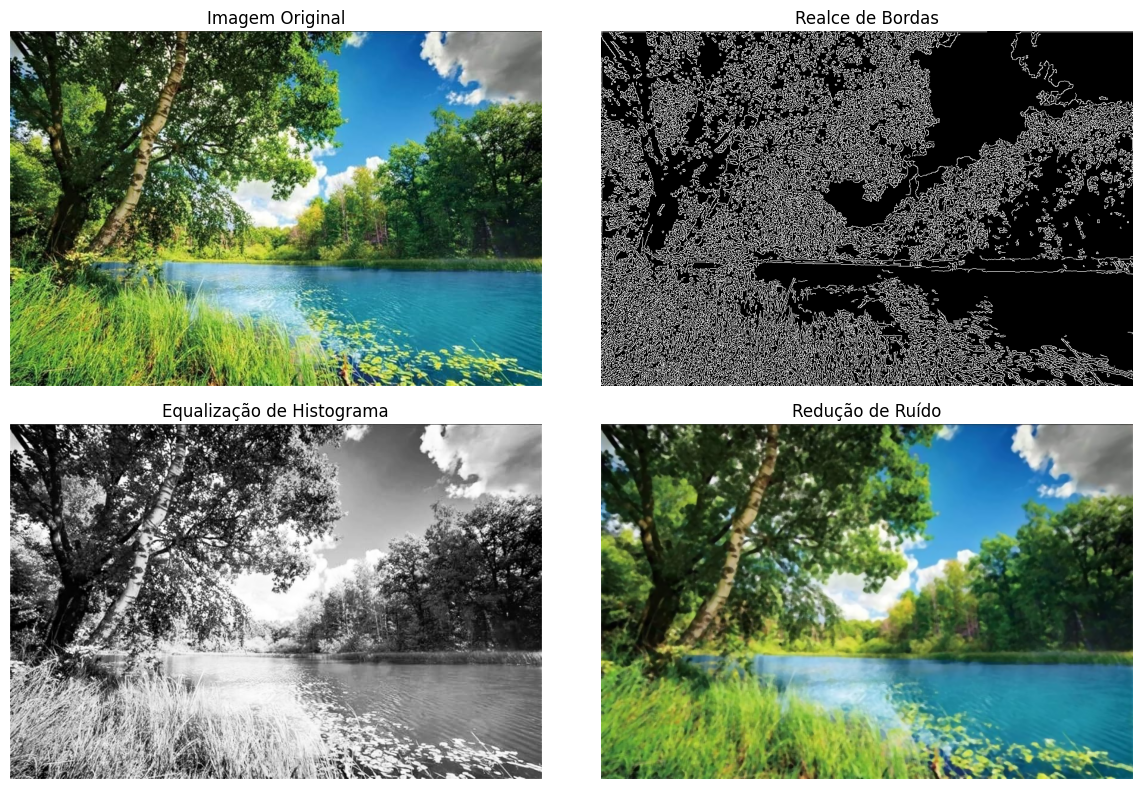

Histograma da Imagem Original:


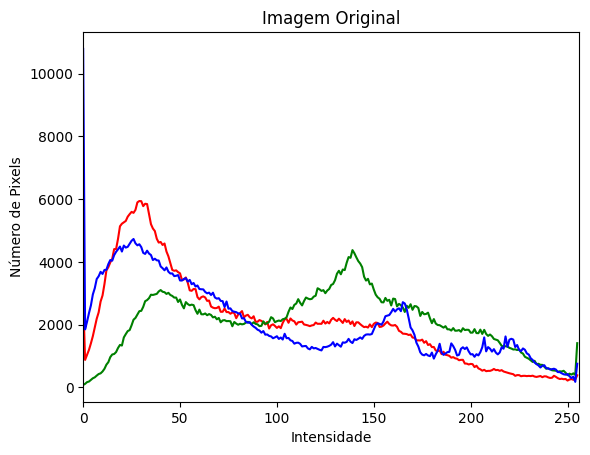

Histograma - Realce de Bordas:


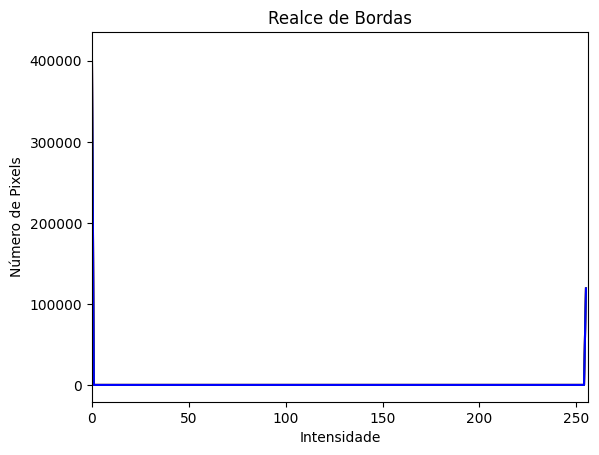

Histograma - Equalização de Histograma:


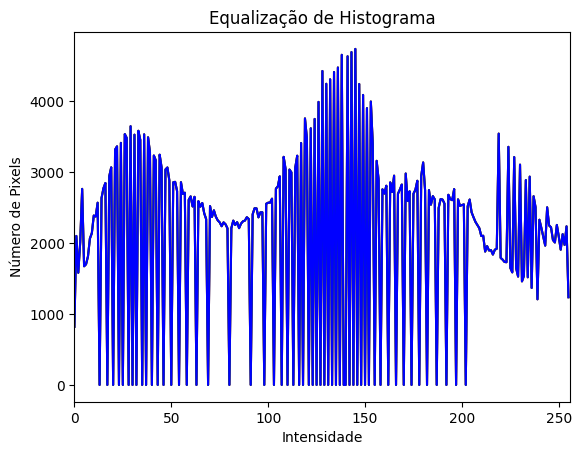

Histograma - Redução de Ruído:


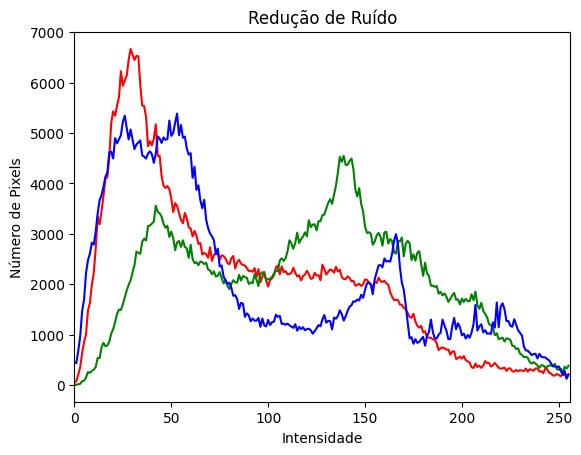


--------------------------------------------------

Processando imagem: AiArtData/1.jpg


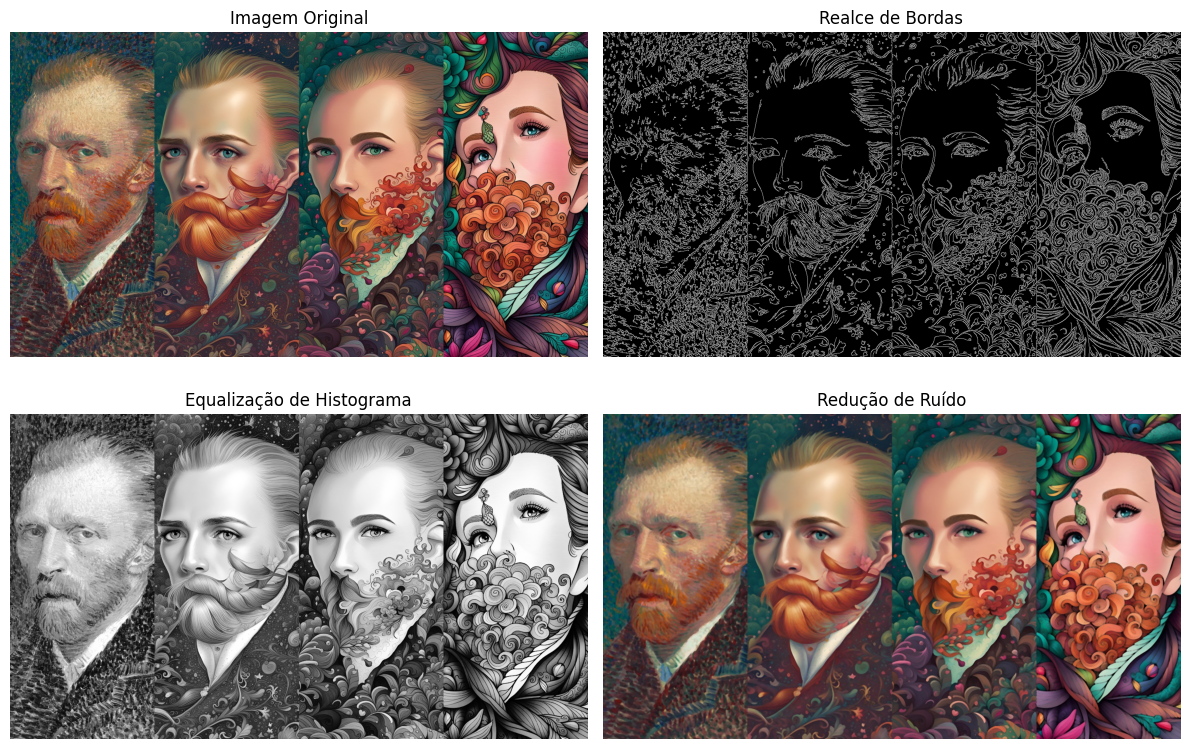

Histograma da Imagem Original:


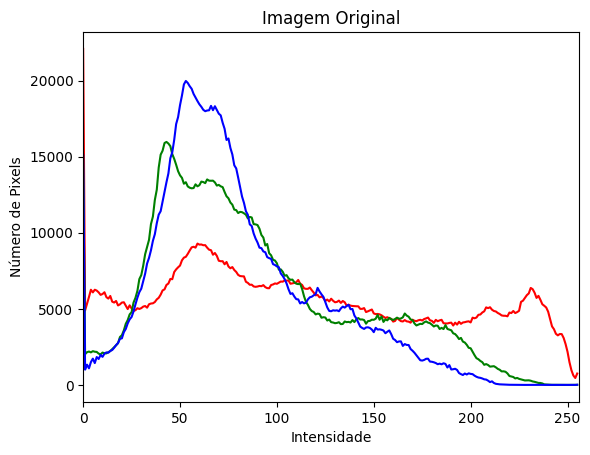

Histograma - Realce de Bordas:


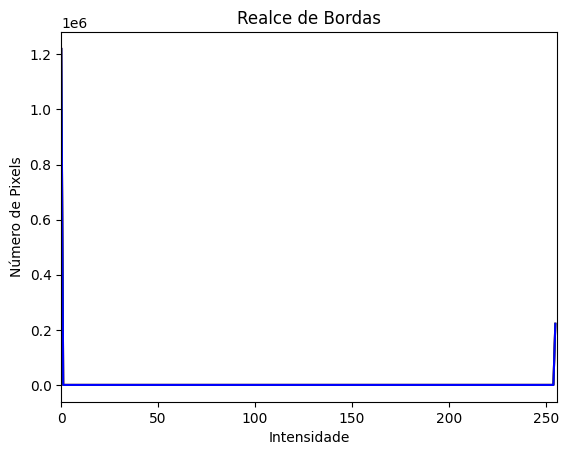

Histograma - Equalização de Histograma:


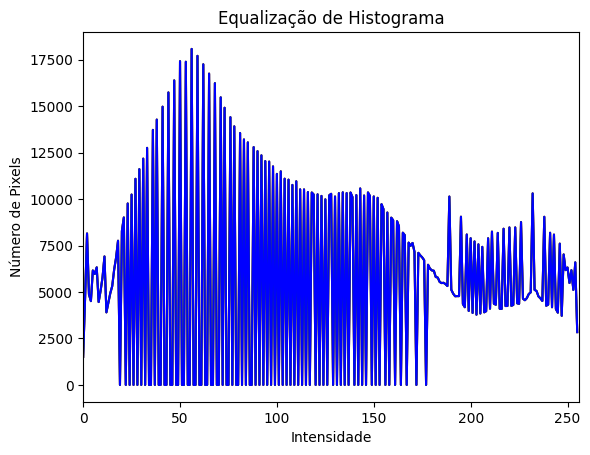

Histograma - Redução de Ruído:


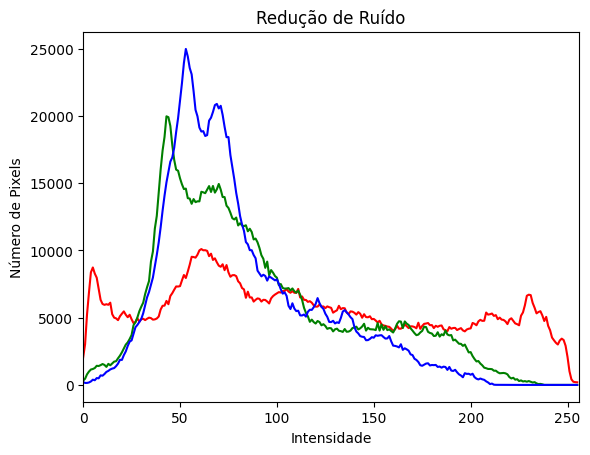


--------------------------------------------------



In [36]:
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Erro ao carregar a imagem: {path}")
        return None  # Retorna None se a imagem não for carregada
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def edge_enhancement(image):
    
    return cv2.Canny(image, 100, 200)

def histogram_equalization(image):
    # Convertendo para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    equalized = cv2.equalizeHist(gray)
    return cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)

def noise_reduction(image):
    
    return cv2.medianBlur(image, 5)

def plot_histograms(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Intensidade")
    plt.ylabel("Número de Pixels")
    colors = ('r', 'g', 'b')

    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

    plt.show()

image_paths = [
    "RealArt/1.jpg",
    "AiArtData/1.jpg"
]

# Função principal 
def process_images(image_paths):
    for path in image_paths:
        print(f"Processando imagem: {path}")
        image = load_image(path)
        if image is None:  
            continue  

        edges = edge_enhancement(image)
        equalized = histogram_equalization(image)
        denoised = noise_reduction(image)
        
        plt.figure(figsize=(12, 8))
        
        plt.subplot(2, 2, 1)
        plt.title("Imagem Original")
        plt.imshow(image)
        plt.axis('off')  
        
        plt.subplot(2, 2, 2)
        plt.title("Realce de Bordas")
        plt.imshow(edges, cmap='gray')
        plt.axis('off')
        
        plt.subplot(2, 2, 3)
        plt.title("Equalização de Histograma")
        plt.imshow(equalized)
        plt.axis('off')
        
        plt.subplot(2, 2, 4)
        plt.title("Redução de Ruído")
        plt.imshow(denoised)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Exibir histogramas
        print("Histograma da Imagem Original:")
        plot_histograms(image, title="Imagem Original")
        
        print("Histograma - Realce de Bordas:")
        plot_histograms(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB), title="Realce de Bordas")
        
        print("Histograma - Equalização de Histograma:")
        plot_histograms(equalized, title="Equalização de Histograma")
        
        print("Histograma - Redução de Ruído:")
        plot_histograms(denoised, title="Redução de Ruído")
        print("\n" + "-"*50 + "\n")

process_images(image_paths)